In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Check the first few rows
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


In [13]:
print("Missing values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Missing values:
 Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

Number of duplicate rows: 0


In [37]:
# split personality into 4 binary target variables 
df['IE'] = df['Personality'].apply(lambda x: 1 if x[0] == 'I' else 0)
df['SN'] = df['Personality'].apply(lambda x: 1 if x[1] == 'N' else 0)
df['TF'] = df['Personality'].apply(lambda x: 1 if x[2] == 'T' else 0)
df['JP'] = df['Personality'].apply(lambda x: 1 if x[3] == 'J' else 0)

In [38]:
from sklearn.preprocessing import StandardScaler
# encoding categorical variables (gender and interests)

# set unknown as the baseline category (it will be the one dropped)
df['Interest'] = pd.Categorical(df['Interest'], 
                                 categories=['Unknown', 'Arts', 'Others', 'Sports', 'Technology'],
                                 ordered=True)

#dummy variable encoding 
df_new = pd.get_dummies(df, columns=['Gender', 'Interest'], drop_first=True)

df_new.drop(columns=['Personality'], inplace=True)

# features we are going to train our model with 
feature_cols = ['Age', 'Education', 'Introversion Score', 'Sensing Score',
                'Thinking Score', 'Judging Score'] + \
               [col for col in df_new.columns if col.startswith('Gender_') or col.startswith('Interest_')]

# scale numeric features 
scaler = StandardScaler()
#overwrite feature columns with scaled versions
df_new[feature_cols] = scaler.fit_transform(df_new[feature_cols])



In [39]:
# test pre-processing 
'''
print("Missing values:\n", df_new.isnull().sum().sum())
print("Duplicate rows:", df_new.duplicated().sum())
print("\nScaled feature stats:")
print(df_new[feature_cols].describe().T[['mean', 'std']])
print("\nExample dummy encoding (first 5 rows):")
print(df_new.filter(like='Interest_').head())
'''

'\nprint("Missing values:\n", df_new.isnull().sum().sum())\nprint("Duplicate rows:", df_new.duplicated().sum())\nprint("\nScaled feature stats:")\nprint(df_new[feature_cols].describe().T[[\'mean\', \'std\']])\nprint("\nExample dummy encoding (first 5 rows):")\nprint(df_new.filter(like=\'Interest_\').head())\n'

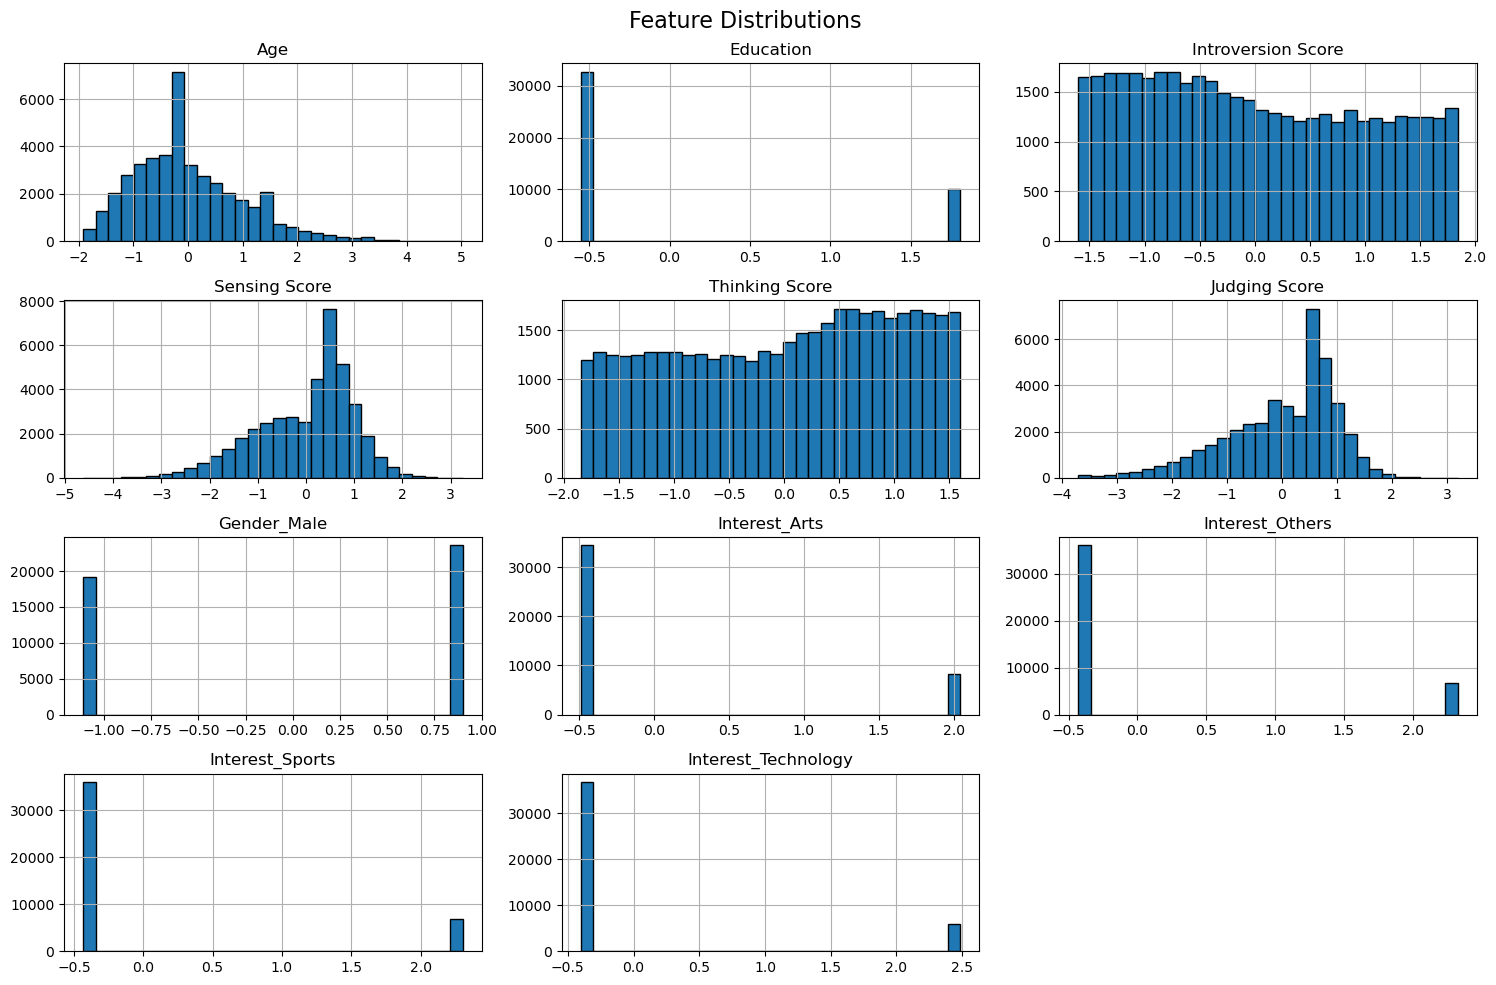

In [40]:
#unsupervised analysis 
import matplotlib.pyplot as plt
import seaborn as sns

# feature distribution plots - using histograms 
df_new[feature_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


In [41]:
df['Interest'].value_counts()

Interest
Unknown       15087
Arts           8249
Sports         6774
Others         6654
Technology     5952
Name: count, dtype: int64

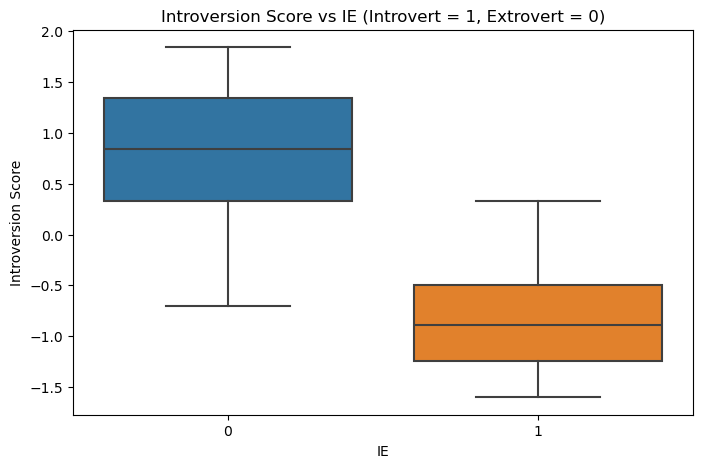

In [34]:
#plotting a feature agaisnt your target variable 
# boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_new, x='IE', y='Introversion Score')
plt.title("Introversion Score vs IE (Introvert = 1, Extrovert = 0)")
plt.xlabel("IE")
plt.ylabel("Introversion Score")
plt.show()

Text(0.5, 1.0, 'Thinking Score vs TF (Thinking = 1, Feeling = 0)')

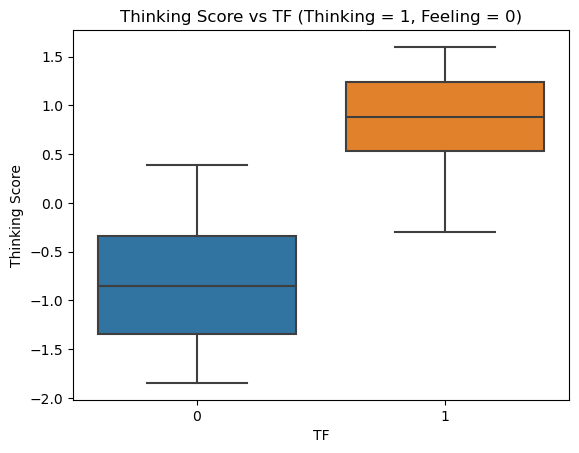

In [22]:
sns.boxplot(data=df_new, x='TF', y='Thinking Score')
plt.title("Thinking Score vs TF (Thinking = 1, Feeling = 0)")

Text(0.5, 1.0, 'Sensing Score vs SN (Intuitive = 1, Sensing = 0)')

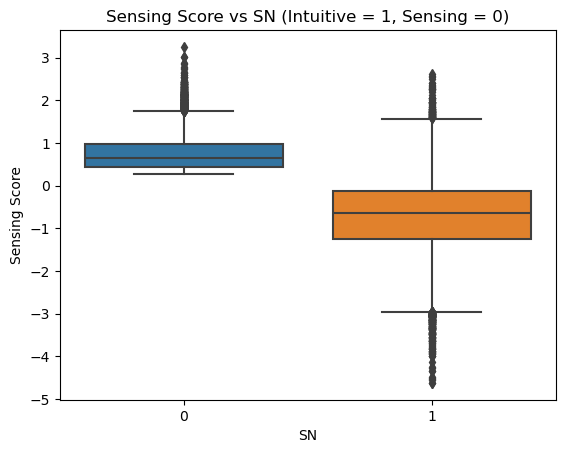

In [ ]:
sns.boxplot(data=df_new, x='SN', y='Sensing Score')
plt.title("Sensing Score vs SN (Intuitive = 1, Sensing = 0)")

Text(0.5, 1.0, 'Judging Score vs JP (Judging = 1, Perceiving = 0)')

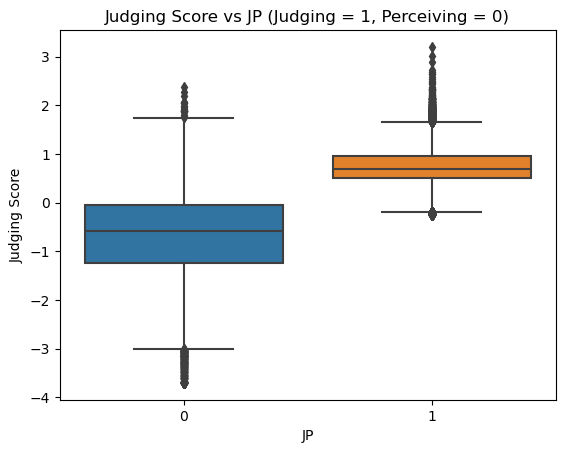

In [26]:
sns.boxplot(data=df_new, x='JP', y='Judging Score')
plt.title("Judging Score vs JP (Judging = 1, Perceiving = 0)")

In [35]:
df_new.groupby('IE')['Introversion Score'].median()


IE
0    0.83908
1   -0.88599
Name: Introversion Score, dtype: float64

In [42]:
df_new['IE'] = df['IE']


In [43]:
df_new.groupby('IE')['Introversion Score'].median()


IE
0    0.83908
1   -0.88599
Name: Introversion Score, dtype: float64

In [44]:
df_new['IE'] = df['Personality'].apply(lambda x: 1 if x[0] == 'I' else 0)

In [45]:
df_new.groupby('IE')['Introversion Score'].median()


IE
0    0.83908
1   -0.88599
Name: Introversion Score, dtype: float64

In [46]:
df[['Personality', 'IE']].head(10)


,Personality,IE
0,ENTP,0
1,INTP,1
2,ESFP,0
3,ENFJ,0
4,ISFP,1
5,ISFJ,1
6,ESTJ,0
7,INFP,1
8,ISFJ,1
9,ESTP,0


Text(0.5, 1.0, 'Introversion Score vs IE (Introvert = 1, Extrovert = 0)')

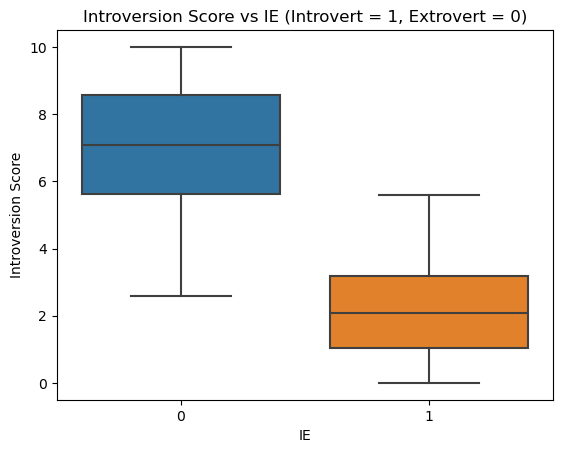

In [47]:
sns.boxplot(data=df, x='IE', y='Introversion Score')
plt.title("Introversion Score vs IE (Introvert = 1, Extrovert = 0)")


In [48]:
df[['Personality', 'Introversion Score', 'IE']].sample(10)


,Personality,Introversion Score,IE
26204,ENTJ,6.19577,0
33051,ENTJ,9.74757,0
978,ESFJ,8.33277,0
36421,ISFP,2.47516,1
36984,ESFP,4.44128,0
11055,INTJ,0.90385,1
15070,ENFJ,7.78681,0
11648,ESFP,7.82101,0
5966,ENFJ,8.44789,0
9682,ENTP,9.85422,0


In [49]:
df[['Personality', 'Sensing Score', 'SN']].sample(10)


,Personality,Sensing Score,SN
32982,ISFP,7.028451,0
18680,ENFJ,4.949046,1
37020,ENTJ,5.152183,1
5377,ENTP,3.417204,1
32272,ESTJ,6.394957,0
21812,INFJ,4.726024,1
16234,ENFJ,4.046466,1
29966,ENFP,3.788573,1
28085,INFJ,5.263745,1
13615,INTP,4.656600,1


In [50]:
df[['Personality', 'Thinking Score', 'TF']].sample(10)


,Personality,Thinking Score,TF
33704,ISTP,7.08984,1
43263,INTJ,8.38044,1
3646,INTJ,7.05005,1
39574,ENTJ,8.00041,1
319,ESFJ,1.77926,0
15858,ESTJ,9.85858,1
27801,ISTJ,8.65690,1
32754,ISTP,6.51225,1
41426,ENFJ,2.71954,0
5312,ESTJ,7.78239,1


In [51]:
df[['Personality', 'Judging Score', 'JP']].sample(10)


,Personality,Judging Score,JP
41467,INTP,5.271769,0
29056,INFP,3.990168,0
15398,ENTJ,6.170504,1
16435,ESTJ,6.212812,1
21358,ISFP,3.924779,0
241,ISFJ,6.044195,1
21303,ISFP,1.729032,0
17435,ISFP,5.809060,0
7009,INTP,5.834528,0
27644,INFJ,5.462987,1


In [52]:
df.rename(columns={'Introversion Score': 'Extroversion Score'}, inplace=True)
df_new.rename(columns={'Introversion Score': 'Extroversion Score'}, inplace=True)

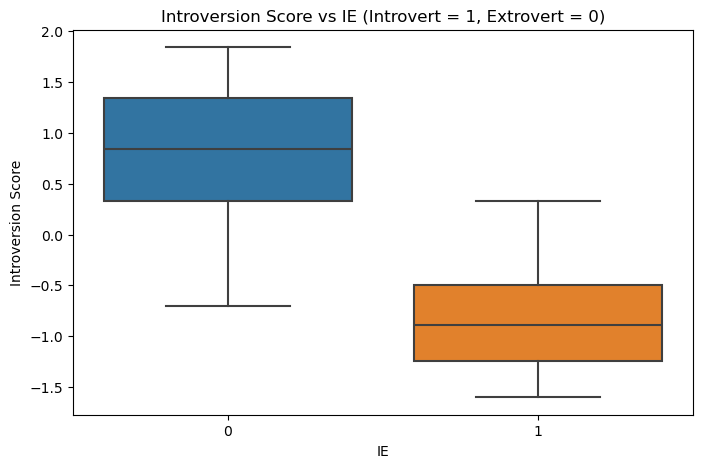

In [54]:
#plotting a feature agaisnt your target variable 
# boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_new, x='IE', y='Extroversion Score')
plt.title("Introversion Score vs IE (Introvert = 1, Extrovert = 0)")
plt.xlabel("IE")
plt.ylabel("Introversion Score")
plt.show()

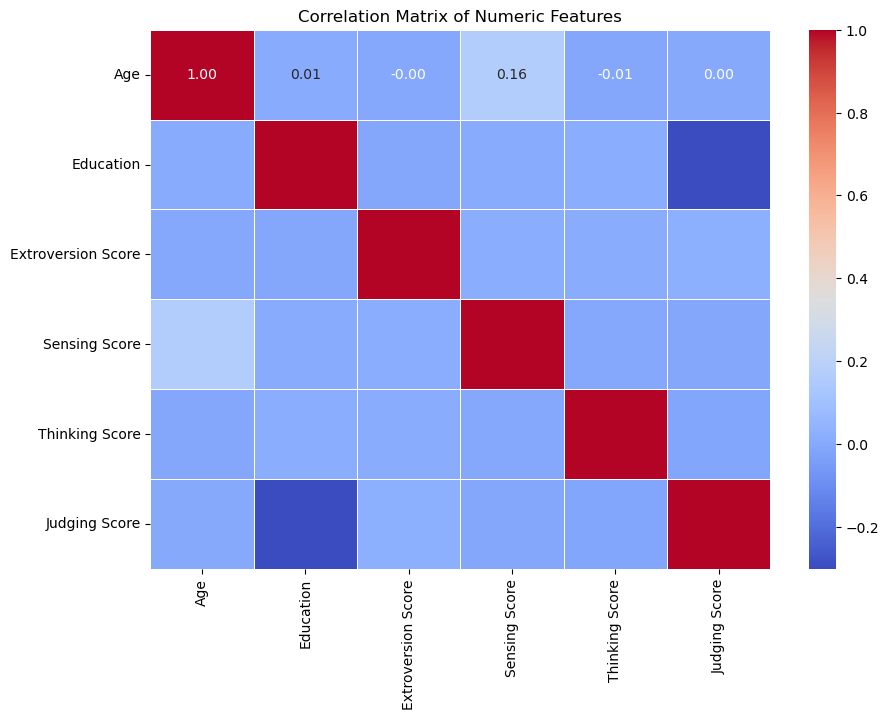

In [ ]:
#correlation matrix to analuze relationships between features 

#numeric features
numeric_features = ['Age', 'Education', 'Extroversion Score', 'Sensing Score', 
                    'Thinking Score', 'Judging Score']

#correlation matrix
corr_matrix = df[numeric_features].corr()

# plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()
